### Meilenstein 3 - Centrality

In [3]:
from src.networkCentrality.myCentrality import OwnCentrality
import test_.HelperClass as Hc
from src.printGraph import draw_graph as draw_graph
from src.Graph import Graph

### Unsere eigene Zentralität

Vielleicht aber nicht das kreativste :D. Allerdings habe ich das Ganze geschrieben, bevor wir die Closeness Centrality in der Vorlesung behandelt haben.

Alle Zentralitäten werden initialisiert oder auf 1 gesetzt, falls nicht initialisert werden soll.

Die Zentralität eines Knotens v berechnet sich nun folgendermaßen:

$\sum_{\text{w Knoten in G, } w\neq v} c(w)\cdot \frac{1}{dist(w, v)^p}$

p kann durch den Nutzer gesetzt werden, ist aber normalerweise einfach 2

Die Laufzeit ist demnach n-mal Breitensuche (Für die Berechnung der Distanzen), also $O(n\cdot m)$. Anschließend muss nochmal in allNodesCentrality über alle Knoten iteriert werden, also $O(n^2)$. 

Die Laufzeit kann analog zur Vorlesung verbessert werden, indem gleichverteilt k Knoten ausgewählt werden und die Breitensuche nur für diese Knoten gemacht wird. Damit haben wir einen Aufwand von:

$O(k\cdot (n + m) + n\cdot k) = O(k\cdot (n + m))$

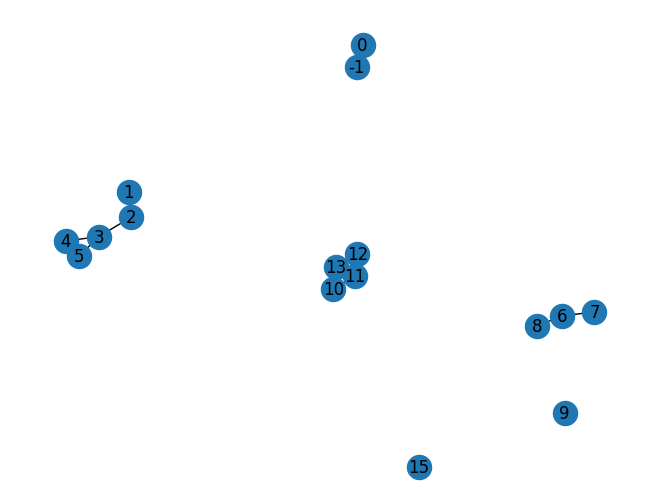

In [18]:
G, _, _ = Hc.create_graph()
G.add_edge(13, 11)
draw_graph(G, True)

In [19]:
# Test aller Funktionalitäten
centr = OwnCentrality(G)

# single node centrality
print(centr.single_node_centrality("3"))

# all nodes centrality as a dictionary
print(centr.all_nodes_centrality())

# most central node (nodes if some nodes have the same value)
print(centr.most_central_node())

# k-most central nodes
print(centr.k_central_nodes(3))

3.25
{'-1': 1.0, '0': 1.0, '1': 1.4722222222222223, '2': 2.5, '3': 3.25, '4': 2.361111111111111, '5': 2.361111111111111, '6': 2.0, '7': 1.25, '8': 1.25, '9': 0, '10': 2.25, '11': 3.0, '12': 2.25, '13': 3.0, '15': 0}
(['3'], 3.25)
(['11', '13', '3'], [3.0, 3.0, 3.25])


In [20]:
# Nun haben wir verschiedene Optionen:
# Wir können die Zentralitäten initialisieren, bspw mit der Grad Zentralität
initial_cent = dict()
for node in G.node_ids_internal_ids:
    initial_cent[node] = G.get_node_degree(node)

centr_init = OwnCentrality(G, init=initial_cent)

print(centr_init.k_central_nodes(3))

(['12', '11', '13'], [6.5, 7.0, 7.0])


In [21]:
# Statt eine Breitensuche über alle Knoten zu machen, können wir k Knoten 
# gleichverteilt auswählen
centr_k_uniform = OwnCentrality(G, k_uniform_nodes=10)

print(centr_k_uniform.k_central_nodes(3))

(['5', '2', '13'], [2.361111111111111, 2.5, 3.0])


In [23]:
# außerdem kann die Distanz anders skaliert werden durch Nutzen von p
centr_p = OwnCentrality(G, p=5)

print(centr_p.k_central_nodes(3))

(['11', '13', '3'], [3.0, 3.0, 3.03125])
